In [1]:
import eegPinelineDesign
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import mne
%matplotlib inline

In [ ]:
eegPinelineDesign.change_file_directory('C:/Users/ning/Downloads/training set')
raw = mne.io.read_raw_brainvision('suj20_l2nap_day2.vhdr',scale=1e6,preload=True)
raw.filter(1,100)
picks=mne.pick_types(raw.info,meg=False,eeg=True,eog=False,stim=False)
raw.notch_filter(np.arange(60,241,60), picks=picks)
raw.filter(12,14)
epochs = np.arange(0,raw.last_samp,30*1000)

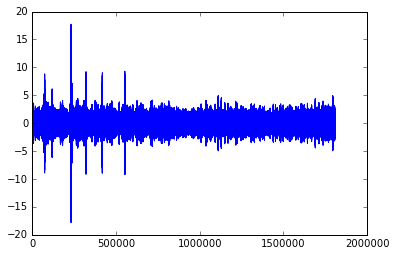

In [32]:
plt.plot(raw._data[0,:])

In [23]:
r={}
for names in list(raw.ch_names):
    r[names]=[]
for epch in range(len(epochs)-1):
    start,stop = (epochs[epch],epochs[epch+1])
    segment, time = raw[:,start:stop]

    for ii,names in enumerate(list(raw.ch_names)):
        
        for jj in range(64):
            r[names].append(pearsonr(segment[ii],segment[jj])[0])


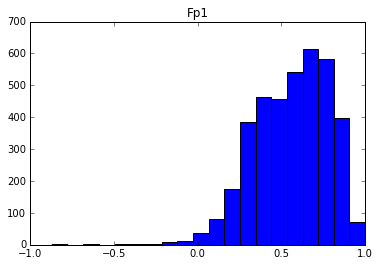

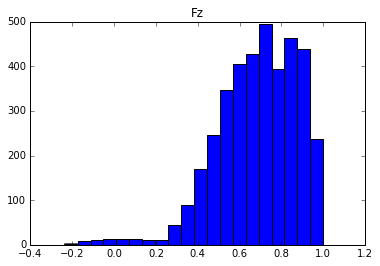

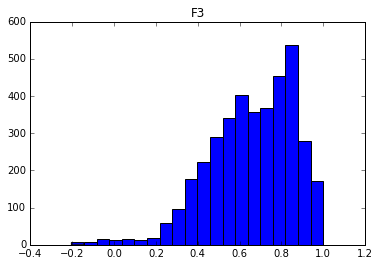

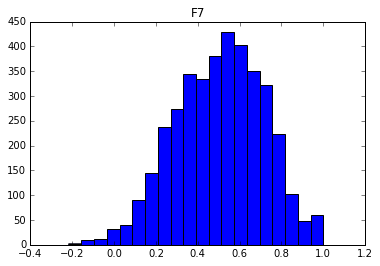

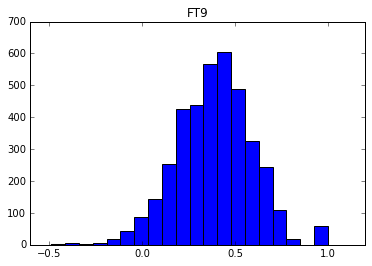

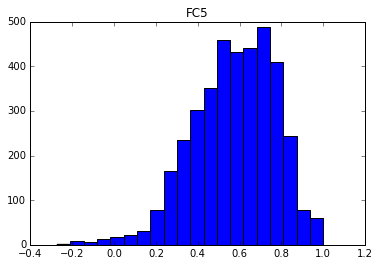

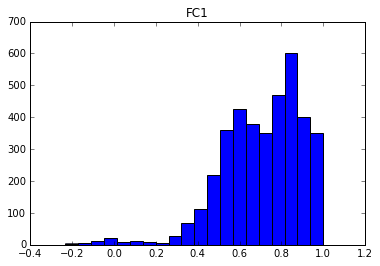

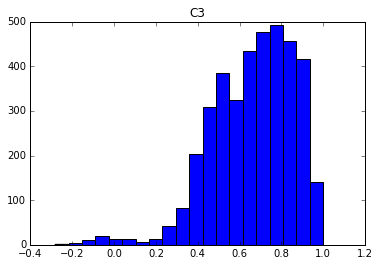

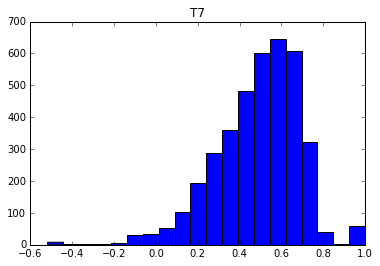

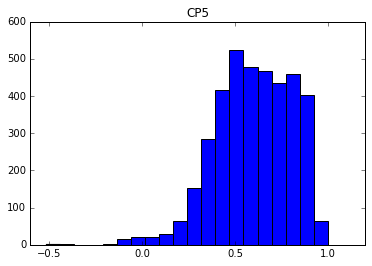

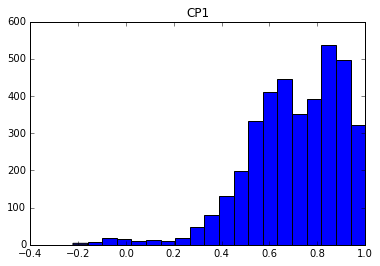

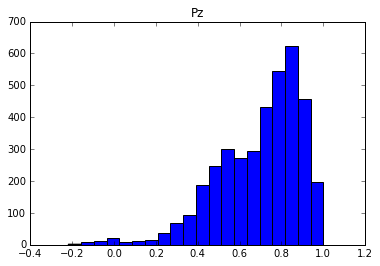

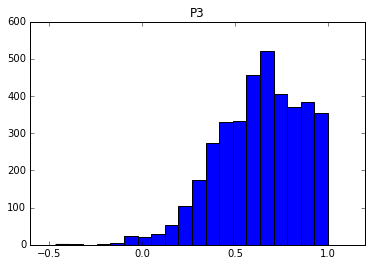

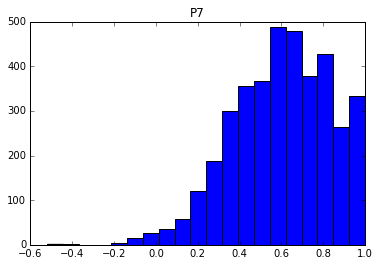

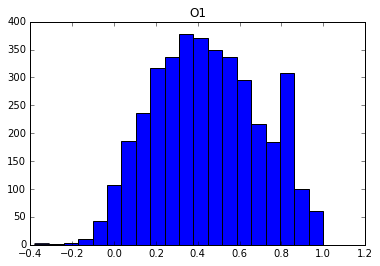

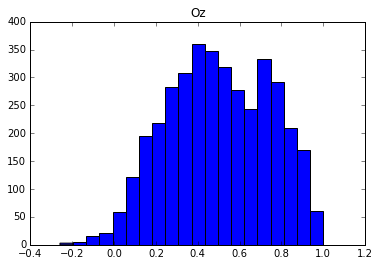

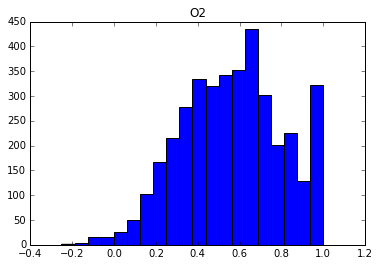

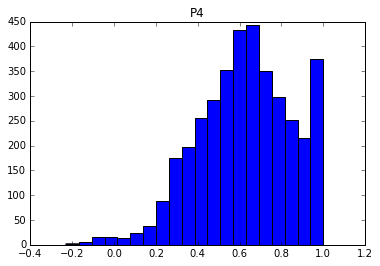

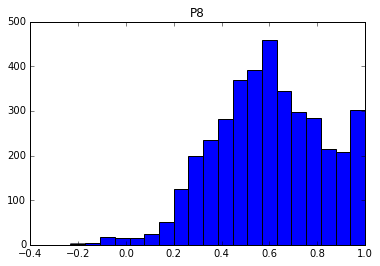

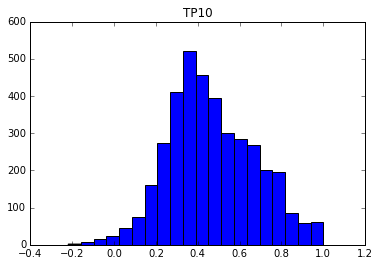

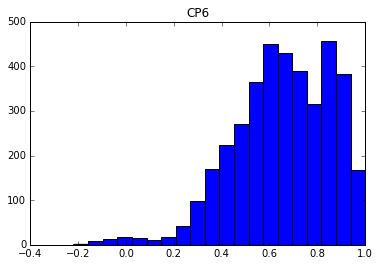

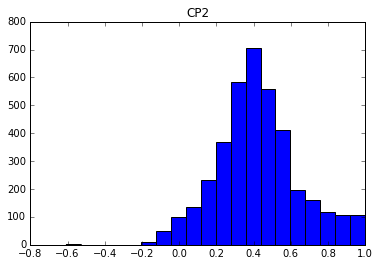

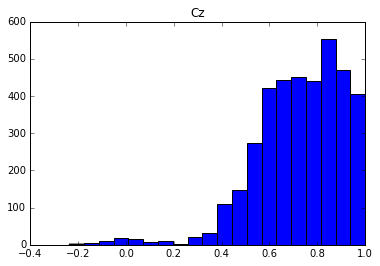

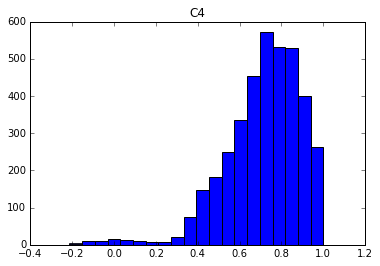

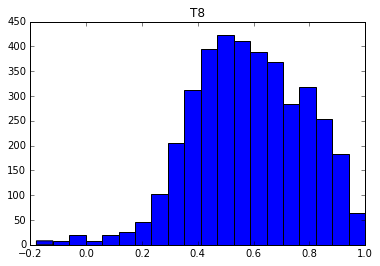

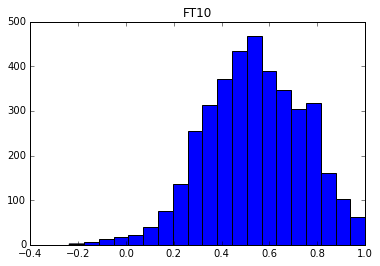

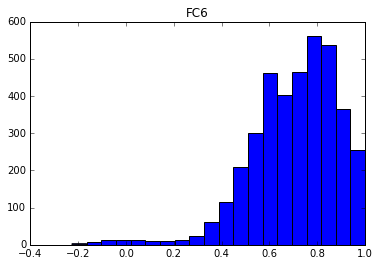

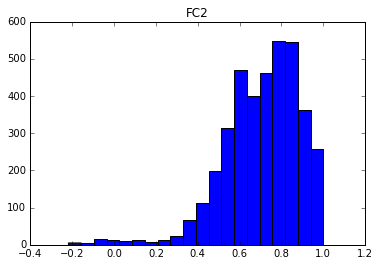

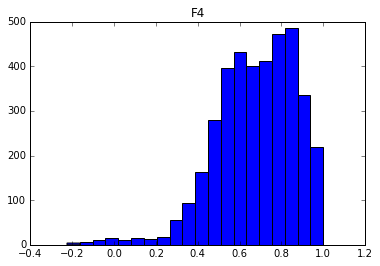

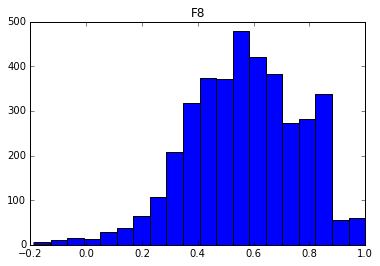

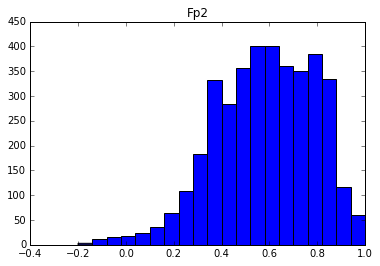

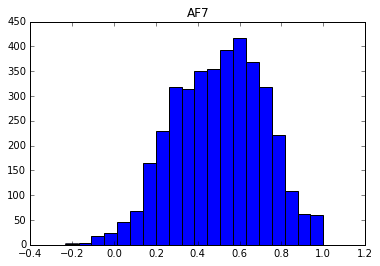

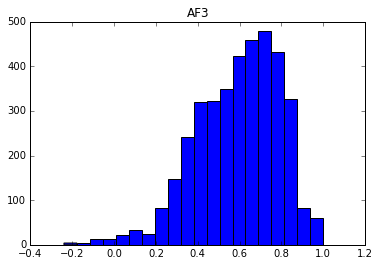

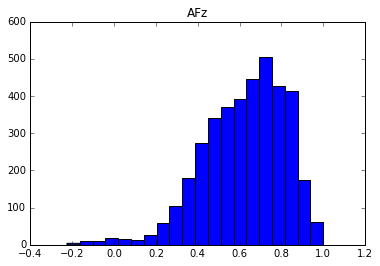

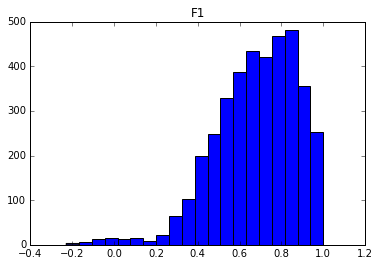

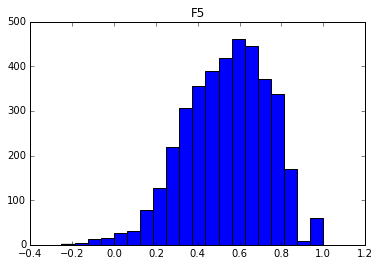

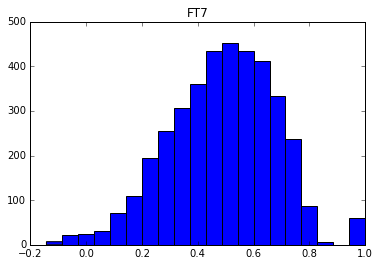

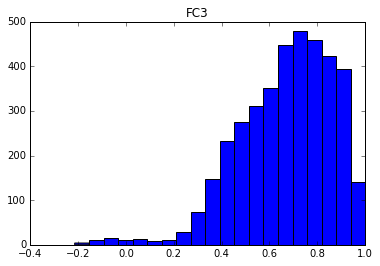

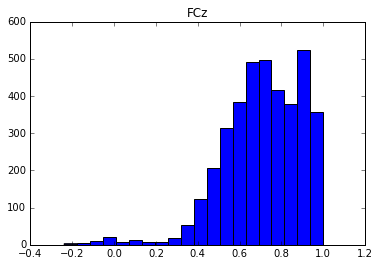

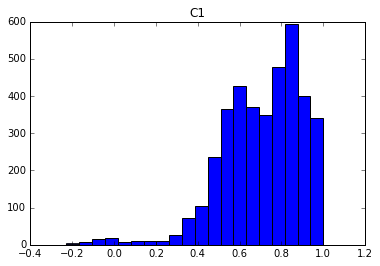

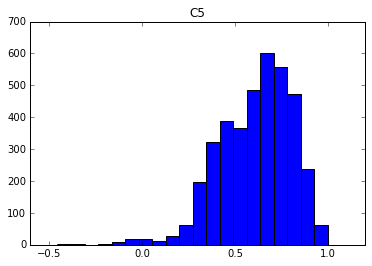

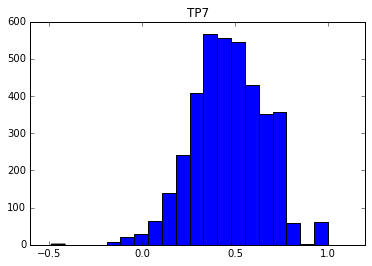

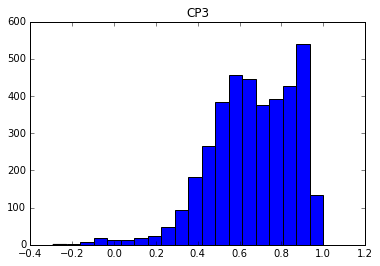

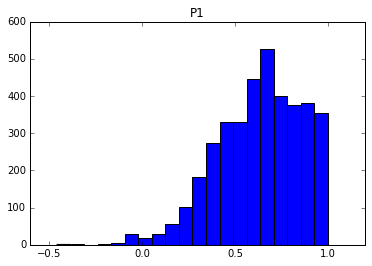

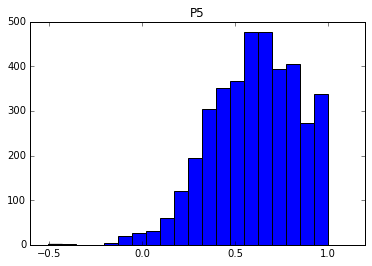

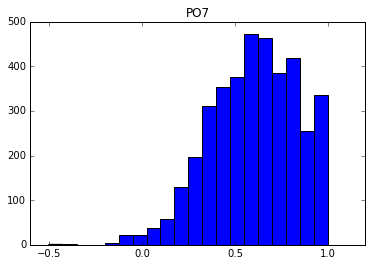

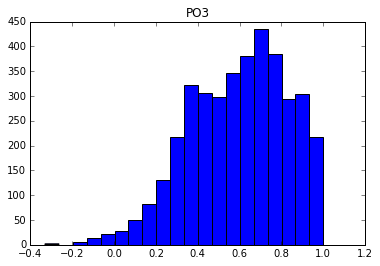

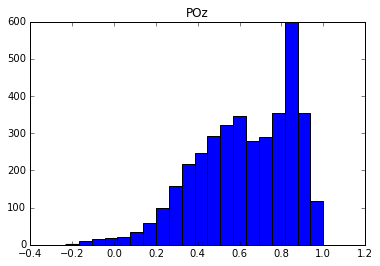

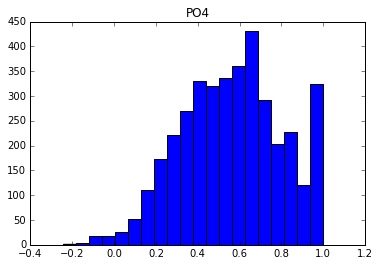

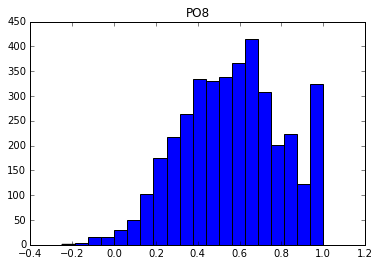

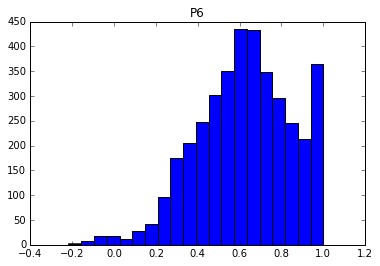

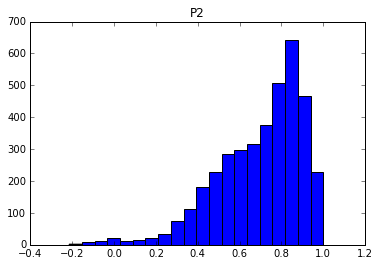

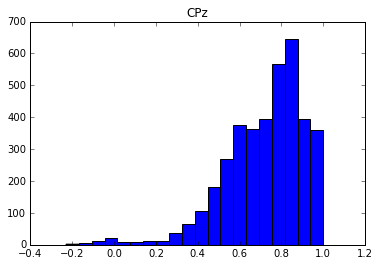

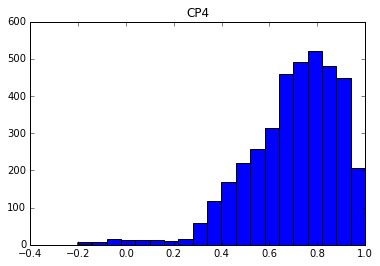

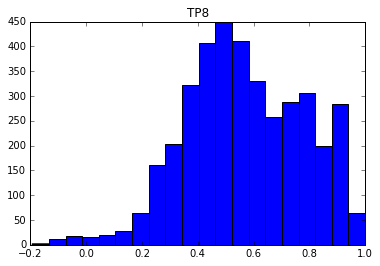

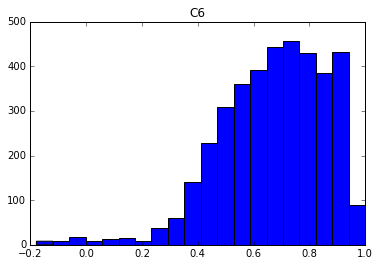

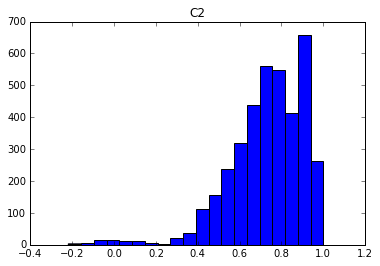

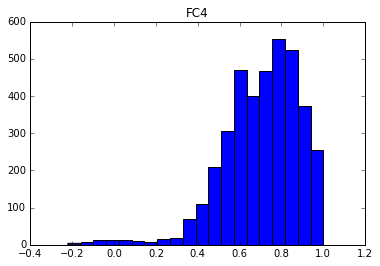

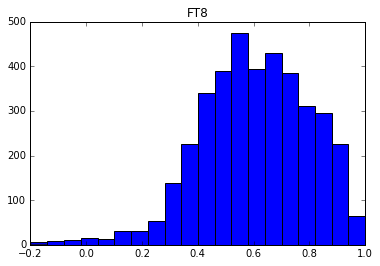

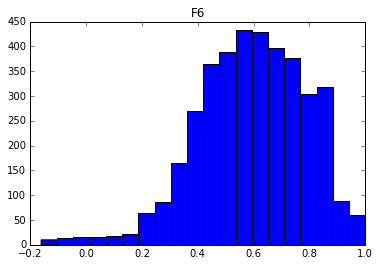

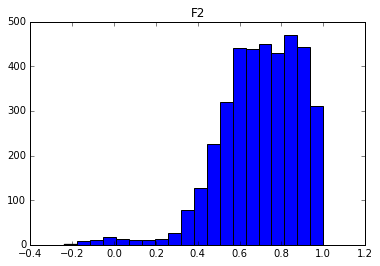

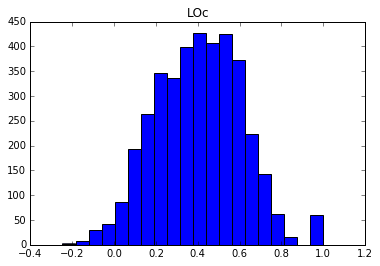

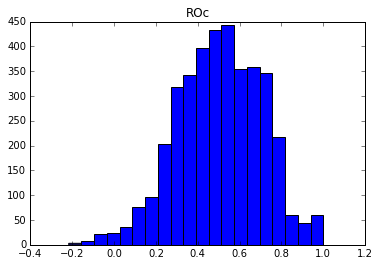

In [29]:
for ii,names in enumerate(list(raw.ch_names[:-2])):
    plt.figure(ii+1)
    plt.hist(r[names],bins=20)
    plt.title(names)
    fileName = 'C:\\Users\\ning\\Downloads\\training set\\figures\\'+names+'.png'
    plt.savefig(fileName)

In [27]:
names+'.png'

'ROc.png'

In [33]:
import pandas as pd

In [37]:
print(list(raw.ch_names))

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'LOc', 'ROc', 'Aux1', 'STI 014']
